# Homework III - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming and critical analysis [8v]

**Consider the ('parkinsons.csv') dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various
biomedical measurements.
T o answer question 5), average the performance of the models over 10 separate runs. In each run, use a diﬀerent 80-20 train-test split by setting a random\_state = i, with i = 1..10.**

5) Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use random\_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./data/parkinsons.csv')

X = df.drop("target", axis = 1)
y = df["target"]

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

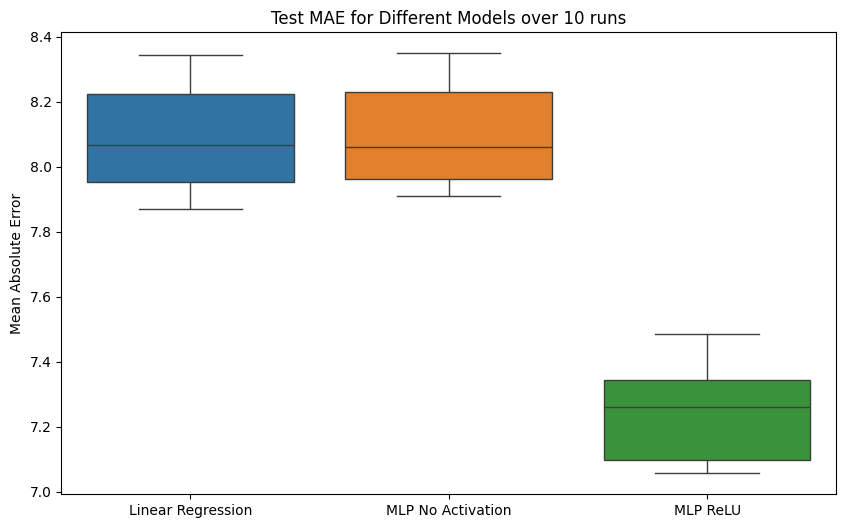

In [7]:
random_seeds = range(1, 11)

results = {'Linear Regression': [], 'MLP No Activation': [], 'MLP ReLU': []}

for seed in random_seeds:
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # 1. Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Linear Regression'].append(mean_absolute_error(y_test, y_pred_lr))

    # 2. MLP with no activation function
    mlp_no_act = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0, max_iter=100)
    mlp_no_act.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_act.predict(X_test)
    results['MLP No Activation'].append(mean_absolute_error(y_test, y_pred_mlp_no_act))

    # 3. MLP with ReLU activation function
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=100)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    results['MLP ReLU'].append(mean_absolute_error(y_test, y_pred_mlp_relu))

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df)
plt.title('Test MAE for Different Models over 10 runs')
plt.ylabel('Mean Absolute Error')
plt.show()

6. Compare a Linear Regression with a MLP with no activations, and explain the impact
and the importance of using activation functions in a MLP . Support your reasoning with the
results from the boxplots.

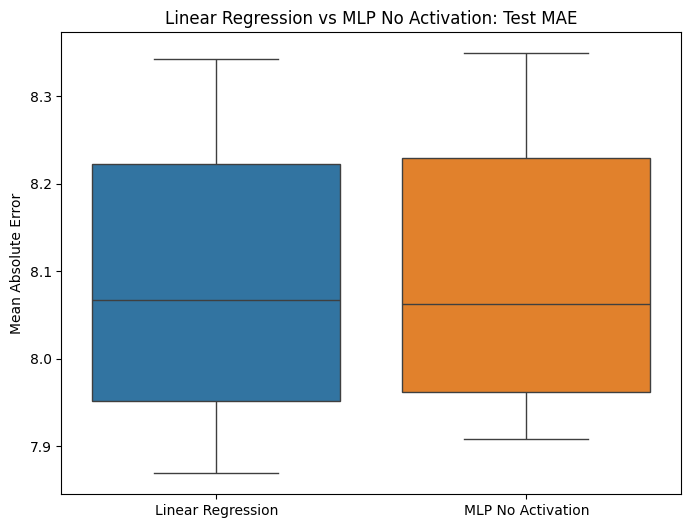

In [8]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=results_df[['Linear Regression', 'MLP No Activation']])
plt.title('Linear Regression vs MLP No Activation: Test MAE')
plt.ylabel('Mean Absolute Error')
plt.show()

BLABLABLA FIXME

7) Using a 80-20 train-test split with random\_state=0, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are: (i) L2 penalty, with the values \{0.0001, 0.001, 0.01\}; (ii) learning rate, with the values \{0.001, 0.01, 0.1\}; and (iii) batch size, with the values \{32, 64, 128\}. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-oﬀs between the combinations.

In [9]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128],  # Batch size
}

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best test MAE: ", -grid_search.best_score_)

results_grid = pd.DataFrame(grid_search.cv_results_)
results_grid = results_grid[['param_alpha', 'param_learning_rate_init', 'param_batch_size', 'mean_test_score']]
results_grid['mean_test_score'] = -results_grid['mean_test_score']

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_alpha', y = 'mean_test_score', hue = 'param_learning_rate_init', style='param_batch_size', data = results_grid, markers = True)
plt.title('Grid Search: Test MAE for Different Hyperparameters')
plt.ylabel('Mean Absolute Error')
plt.xlabel('L2 Penalty (alpha)')
plt.legend(title='Learning Rate / Batch Size')
plt.show()



KeyboardInterrupt: 